In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [131]:
df=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df.head()
##Test dataset

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [132]:
df1=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
df1.head()
##Train dataset

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [134]:
df1.replace()
df1['Log GDP per capita'] = df1['Log GDP per capita'].fillna(0)
df1['Social support']=df1['Social support'].fillna(0)
df1['Healthy life expectancy at birth']=df1['Healthy life expectancy at birth'].fillna(0)
df1['Freedom to make life choices']=df1['Freedom to make life choices'].fillna(0)
df1['Generosity']=df1['Generosity'].fillna(0)
df1['Perceptions of corruption']=df1['Perceptions of corruption'].fillna(0)
df1['Positive affect']=df1['Positive affect'].fillna(0)
df1['Negative affect']=df1['Negative affect'].fillna(0)

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [136]:
df1[df1["Country name"]=='Portugal']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1409,Portugal,2006,5.405,10.360,0.905,69.84,0.882,-0.179,0.880,0.709,0.333
1410,Portugal,2008,5.717,10.384,0.886,70.32,0.646,-0.217,0.933,0.703,0.309
1411,Portugal,2010,5.095,10.368,0.864,70.80,0.721,-0.106,0.948,0.742,0.265
1412,Portugal,2011,5.220,10.353,0.856,71.00,0.875,-0.173,0.962,0.725,0.279
1413,Portugal,2012,4.994,10.315,0.866,71.20,0.774,-0.097,0.959,0.729,0.370
1414,Portugal,2013,5.158,10.312,0.867,71.40,0.788,-0.118,0.946,0.700,0.348
1415,Portugal,2014,5.127,10.325,0.862,71.60,0.847,-0.126,0.941,0.705,0.358
1416,Portugal,2015,5.081,10.347,0.866,71.80,0.800,-0.163,0.941,0.657,0.371
1417,Portugal,2016,5.447,10.370,0.905,72.00,0.838,-0.225,0.922,0.684,0.326
1418,Portugal,2017,5.711,10.407,0.900,72.20,0.905,-0.176,0.881,0.649,0.294


In [137]:
arr=df1["Country name"].unique()
arr

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [138]:
arr[120]

'Portugal'

In [139]:
from sklearn import linear_model

In [140]:
X=df1[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption']]
Y=df1[['Positive affect']]

In [141]:
df[df["Country name"]=="India"]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405


In [142]:
#df['Ladder score']=pd.to_numeric(df['Ladder score'],downcast="float")
#df['Logged GDP per capita']=pd.to_numeric(df['Logged GDP per capita'], downcast="float")
#df['Social support']=pd.to_numeric(df['Social support'],downcast="float")
#df['Healthy life expectancy']=pd.to_numeric(df['Healthy life expectancy'],downcast="float")
#df['Freedom to make life choices']=pd.to_numeric(df['Freedom to make life choices'],downcast="float")
#df['Generosity']=pd.to_numeric(df['Generosity'],downcast="float")
#df['Perceptions of corruption']=pd.to_numeric(df['Perceptions of corruption'],downcast="float")

In [143]:
df.sort_values(by='Country name', ascending=True, inplace=True)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
92,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
56,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
85,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127


In [144]:
y0=[]
count=0
for i in arr:
    print(i)
    t=df1[df1["Country name"]==i]
    X=t[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
         'Freedom to make life choices','Generosity','Perceptions of corruption']]
    Y=t[['Positive affect']]
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    if df[df['Country name']==i]['Country name'].shape[0]==0:
        continue
    count=df[df['Country name']==i].index[0]
    t0=df[df["Country name"]==i]#[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy',
         #'Freedom to make life choices','Generosity','Perceptions of corruption']]
    a=df[df["Country name"]==i]['Ladder score'].loc[count]
    b=df[df["Country name"]==i]['Logged GDP per capita'].loc[count]
    c=df[df["Country name"]==i]['Social support'].loc[count]
    d=df[df["Country name"]==i]['Healthy life expectancy'].loc[count]
    e=df[df["Country name"]==i]['Freedom to make life choices'].loc[count]
    f=df[df["Country name"]==i]['Generosity'].loc[count]
    g=df[df["Country name"]==i]['Perceptions of corruption'].loc[count]
    z0=regr.predict([[a,b,c,d,e,f,g]])[0][0]
    print(z0)
    y0.append([i,z0,1-z0])

Afghanistan
0.4148466574647496
Albania
0.6877958939335759
Algeria
0.5876225551418202
Angola
Argentina
0.8009688304616613
Armenia
0.5922087441604704
Australia
0.7665347253188641
Austria
0.7569013580083279
Azerbaijan
0.616760016811483
Bahrain
0.8289181254875703
Bangladesh
0.5829851210467591
Belarus
0.552758015828914
Belgium
0.7113167138996657
Belize
Benin
0.6407309585886962
Bhutan
Bolivia
0.7618134027240242
Bosnia and Herzegovina
0.643243968336793
Botswana
0.725865738557868
Brazil
0.7253703300124341
Bulgaria
0.673710894634569
Burkina Faso
0.6903694702474876
Burundi
0.6384581229100859
Cambodia
0.9158856802849336
Cameroon
0.6432608219967975
Canada
0.8163469034944673
Central African Republic
Chad
0.5886562261268657
Chile
0.826240729360129
China
0.8395960352887727
Colombia
0.8126716106078296
Comoros
0.7429458160873598
Congo (Brazzaville)
0.629003195048782
Congo (Kinshasa)
Costa Rica
0.8559762413243892
Croatia
0.6338399939333925
Cuba
Cyprus
0.7606869703096222
Czech Republic
0.7866656988140046

In [146]:
y0

[['Afghanistan', 0.4148466574647496, 0.5851533425352504],
 ['Albania', 0.6877958939335759, 0.3122041060664241],
 ['Algeria', 0.5876225551418202, 0.41237744485817984],
 ['Argentina', 0.8009688304616613, 0.19903116953833866],
 ['Armenia', 0.5922087441604704, 0.4077912558395296],
 ['Australia', 0.7665347253188641, 0.23346527468113587],
 ['Austria', 0.7569013580083279, 0.24309864199167208],
 ['Azerbaijan', 0.616760016811483, 0.38323998318851704],
 ['Bahrain', 0.8289181254875703, 0.17108187451242973],
 ['Bangladesh', 0.5829851210467591, 0.41701487895324085],
 ['Belarus', 0.552758015828914, 0.44724198417108596],
 ['Belgium', 0.7113167138996657, 0.28868328610033434],
 ['Benin', 0.6407309585886962, 0.3592690414113038],
 ['Bolivia', 0.7618134027240242, 0.2381865972759758],
 ['Bosnia and Herzegovina', 0.643243968336793, 0.356756031663207],
 ['Botswana', 0.725865738557868, 0.27413426144213204],
 ['Brazil', 0.7253703300124341, 0.2746296699875659],
 ['Bulgaria', 0.673710894634569, 0.326289105365431

In [147]:
np_y0=np.array(y0)

In [156]:
df0 = pd.DataFrame(np_y0,columns=['Country','positive effect','negative effect'])

In [157]:
df0.head()

,Country,positive effect,negative effect
0,Afghanistan,0.4148466574647496,0.5851533425352504
1,Albania,0.6877958939335759,0.3122041060664241
2,Algeria,0.5876225551418202,0.41237744485817984
3,Argentina,0.8009688304616613,0.19903116953833866
4,Armenia,0.5922087441604704,0.4077912558395296


In [158]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
92,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
56,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
85,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127


In [159]:
df0.head()

,Country,positive effect,negative effect
0,Afghanistan,0.4148466574647496,0.5851533425352504
1,Albania,0.6877958939335759,0.3122041060664241
2,Algeria,0.5876225551418202,0.41237744485817984
3,Argentina,0.8009688304616613,0.19903116953833866
4,Armenia,0.5922087441604704,0.4077912558395296


In [163]:
df0.sort_values(by=['positive effect'],ascending=False, inplace=True)

In [164]:
df0.head()

,Country,positive effect,negative effect
139,United Arab Emirates,0.9607459030802374,0.03925409691976256
20,Cambodia,0.9158856802849336,0.08411431971506644
56,Indonesia,0.8718714829893761,0.1281285170106239
106,Panama,0.8618053518494841,0.13819464815051585
48,Guatemala,0.8595135859914028,0.14048641400859718


In [165]:
df0[df0['Country']=='Portugal']

,Country,positive effect,negative effect
111,Portugal,0.6710845765471931,0.3289154234528069


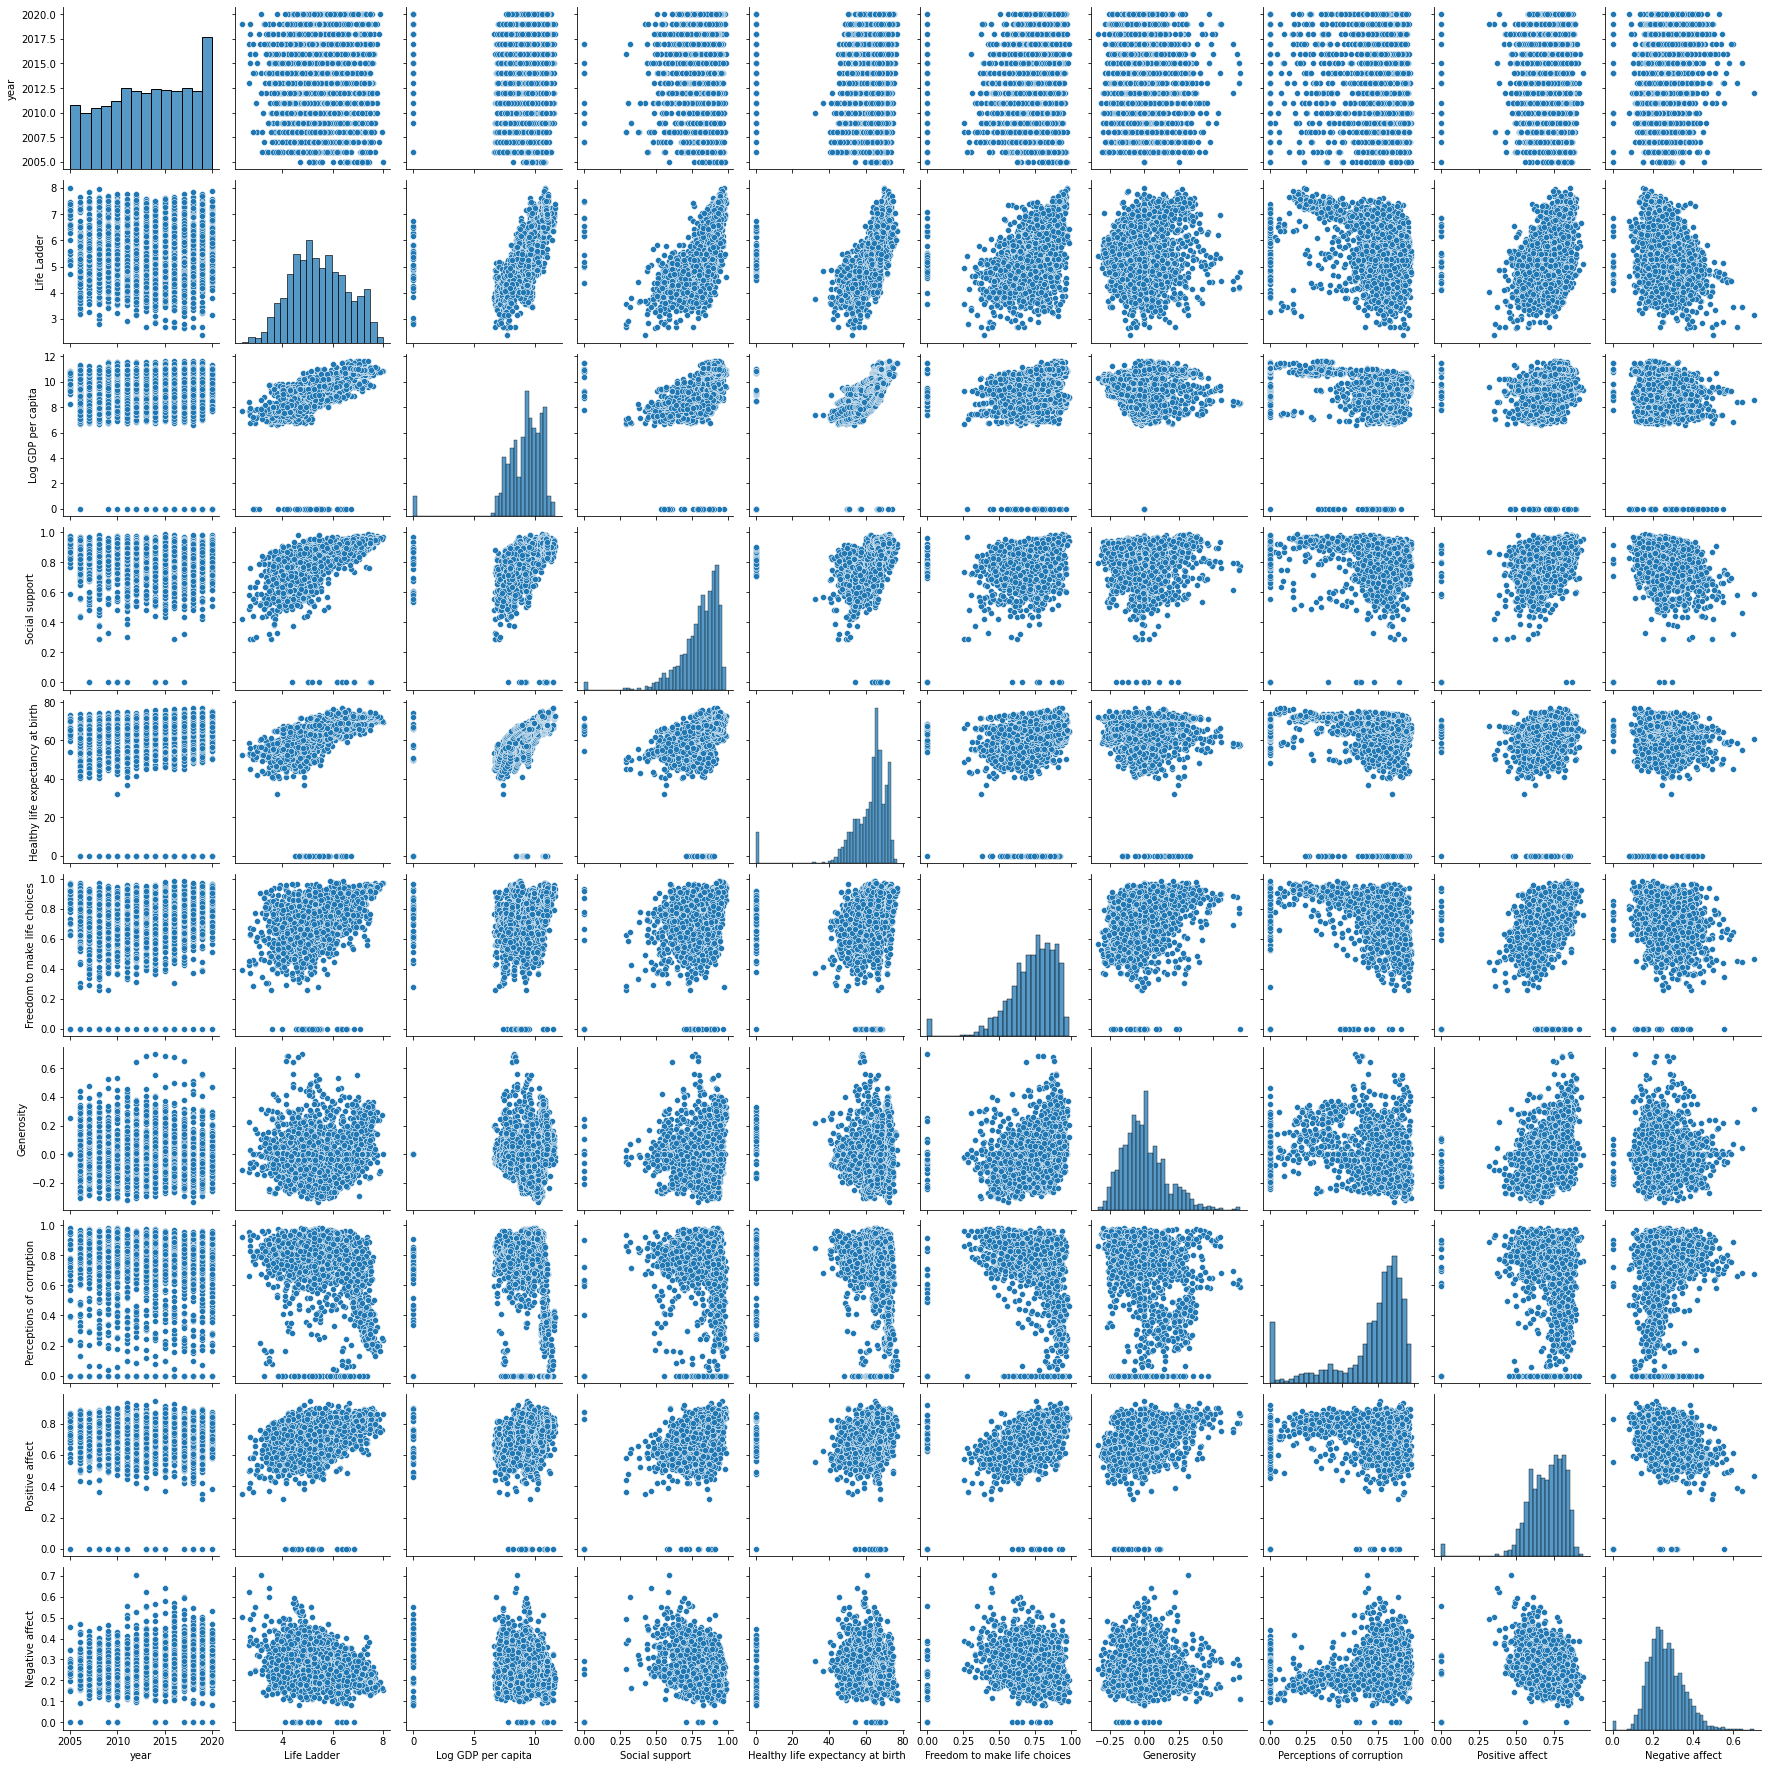

In [166]:
import seaborn as sns
sns.pairplot(df1)